In [1]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

df_diabetes = pd.read_csv('diabetes.csv')
print(df_diabetes.shape)
df_diabetes.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [2]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Diabetes                    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
target_column = ['Diabetes'] 
predictors = list(set(list(df_diabetes.columns))-set(target_column))
print(predictors)

['Glucose', 'Insulin', 'SkinThickness', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'Pregnancies']


In [5]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()

df_std = df_diabetes.copy()

df_std[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,3.614007e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,-1.327244e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,7.994184e-17,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.556183e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.295979e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.398978e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Diabetes,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split

X_std = df_std[predictors].values
y_std = df_std[target_column].values

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, 
                                                                    test_size=0.30, 
                                                                    random_state=12)
print(X_train_std.shape)
print(X_test_std.shape)

(537, 8)
(231, 8)


In [7]:
#https://scikit-learn.org/0.19//_downloads/scikit-learn-docs.pdf
def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=None,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize == 'Recall':
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix - Recall")
    elif normalize == 'Precision':
        cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
        print("Normalized confusion matrix - Precision")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else"black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp_std = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=42                        
                       )
mlp_std.fit(X_train_std, y_train_std)
predict_test_std = mlp_std.predict(X_test_std)

print()
print(classification_report(y_test_std,predict_test_std))
print()

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



             precision    recall  f1-score   support

          0       0.81      0.85      0.83       147
          1       0.71      0.65      0.68        84

avg / total       0.78      0.78      0.78       231




Confusion matrix, without normalization
[[125  22]
 [ 29  55]]
Normalized confusion matrix - Recall
[[0.85 0.15]
 [0.35 0.65]]


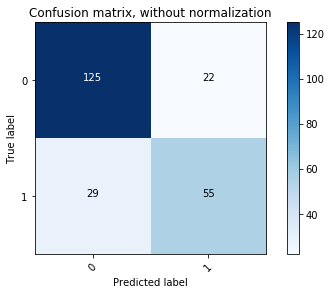

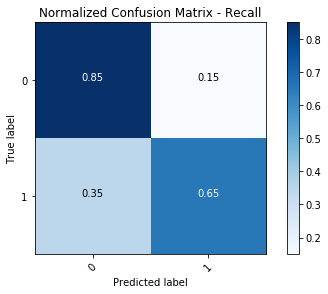

Normalized confusion matrix - Precision
[[0.81 0.14]
 [0.38 0.71]]


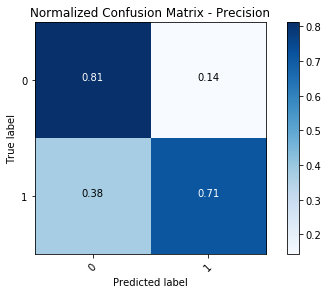

In [9]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_std, predict_test_std)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix - recall
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'], 
                      normalize='Recall',
                      title='Normalized Confusion Matrix - Recall')
plt.show()

# Plot normalized confusion matrix - precision
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'], 
                      normalize='Precision',
                      title='Normalized Confusion Matrix - Precision')
plt.show()

In [10]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()

df_norm = df_diabetes.copy()

df_norm[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.022645,0.020956,0.00000,0.006476,0.016716,0.033330,0.117208
Glucose,768.0,0.682903,0.161166,0.00000,0.587637,0.704501,0.801606,0.973682
BloodPressure,768.0,0.402801,0.153428,0.00000,0.317522,0.430685,0.511070,0.848036
SkinThickness,768.0,0.112086,0.092546,0.00000,0.000000,0.114464,0.181524,0.419691
Insulin,768.0,0.318921,0.338570,0.00000,0.000000,0.249215,0.632833,0.970458
BMI,768.0,0.186874,0.063402,0.00000,0.146291,0.186167,0.226831,0.400734
DiabetesPedigreeFunction,768.0,0.002710,0.001902,0.00025,0.001379,0.002159,0.003507,0.013417
Age,768.0,0.195434,0.080940,0.03246,0.139930,0.181108,0.239313,0.616539
Diabetes,768.0,0.348958,0.476951,0.00000,0.000000,0.000000,1.000000,1.000000


In [11]:
from sklearn.model_selection import train_test_split

X_norm = df_norm[predictors].values
y_norm = df_norm[target_column].values

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.30, 
                                                                        random_state=12)
print(X_train_norm.shape)
print(X_test_norm.shape)

(537, 8)
(231, 8)


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

mlp_norm = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=42
                       )
mlp_norm.fit(X_train_norm, y_train_norm)
predict_test_norm = mlp_norm.predict(X_test_norm)

print()
print(classification_report(y_test_norm,predict_test_norm))
print()

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



             precision    recall  f1-score   support

          0       0.71      0.85      0.77       147
          1       0.59      0.38      0.46        84

avg / total       0.66      0.68      0.66       231




Confusion matrix, without normalization
[[125  22]
 [ 52  32]]
Normalized confusion matrix - Recall
[[0.85 0.15]
 [0.62 0.38]]


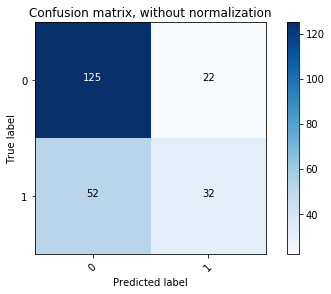

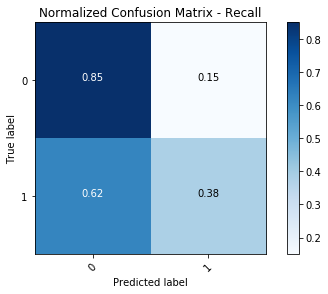

Normalized confusion matrix - Precision
[[0.71 0.12]
 [0.96 0.59]]


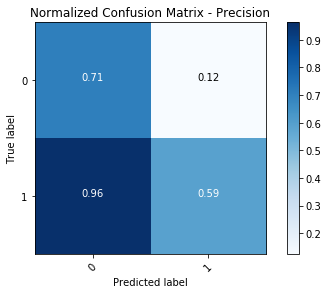

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_norm, predict_test_norm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix - recall
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'], 
                      normalize='Recall',
                      title='Normalized Confusion Matrix - Recall')
plt.show()

# Plot normalized confusion matrix - precision
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['0','1'], 
                      normalize='Precision',
                      title='Normalized Confusion Matrix - Precision')
plt.show()